In [181]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

np.random.seed(42)

### Analisi Esplorativa dei dati

In [182]:
df = pandas.read_csv('data/sexual_violence_df.csv')

display(df)
df.describe()

,geo,year,sexual_violence,poverty,neet,education,unemployment,income,inequity
0,Austria,2016,50.53,14.964810,8.091438,34.540870,3.828207,62.528811,4.09
1,Belgium,2016,69.24,25.110680,13.799563,50.108248,5.316225,60.783882,3.85
2,Bulgaria,2016,7.74,29.330514,16.024476,23.464412,3.648430,32.978295,7.69
3,Cyprus,2016,2.83,1.917201,1.526974,4.767553,0.729554,52.772737,4.88
4,Czechia,2016,13.20,13.086765,11.714766,34.405528,2.743999,43.974128,3.50
...,...,...,...,...,...,...,...,...,...
157,Portugal,2021,26.40,23.068084,9.783339,48.916697,4.531231,48.953165,5.66
158,Romania,2021,12.21,66.245734,38.979374,44.739872,6.144532,37.809305,7.14
159,Sweden,2021,217.72,17.852387,6.227577,51.169924,6.746542,63.711278,4.04
160,Slovenia,2021,21.20,2.783850,1.539553,10.102000,0.653783,54.222503,3.24


,year,sexual_violence,poverty,neet,education,unemployment,income,inequity
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2018.500000,35.433148,36.320591,23.064795,64.467123,8.095696,52.712330,4.844383
std,1.713121,40.640215,48.065890,34.141798,84.069332,12.501566,10.340572,1.202327
min,2016.000000,1.790000,0.892976,0.347262,1.544923,0.114168,30.526920,3.030000
25%,2017.000000,9.035000,7.893735,3.570964,14.613305,1.431114,44.140811,4.042500
50%,2018.500000,20.630000,14.914794,8.182723,29.957130,2.847736,53.328431,4.435000
75%,2020.000000,49.967500,30.007613,18.667848,51.700525,6.701091,62.307751,5.727500
max,2021.000000,217.720000,174.625565,148.023944,339.452221,59.443327,74.903505,8.230000


<Axes: >

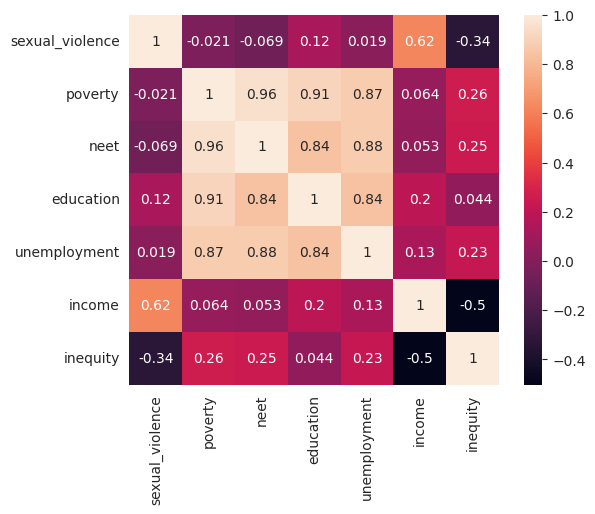

In [183]:
# Correlation Matrix
corrmat = df.drop(columns=["geo", "year"]).corr()

sns.heatmap(corrmat, square=True, annot=True)

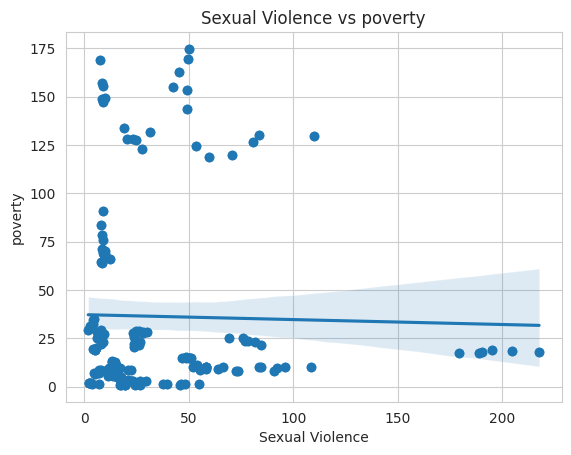

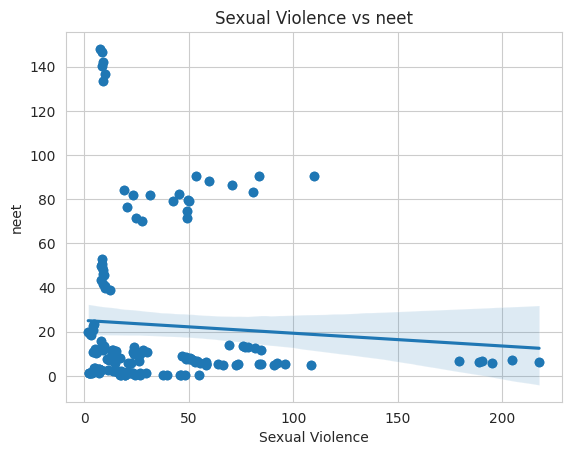

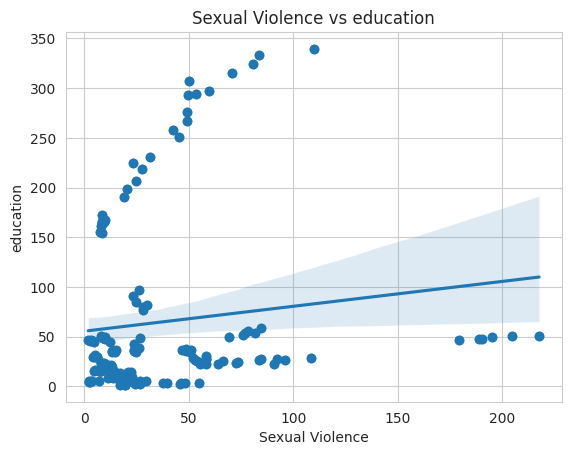

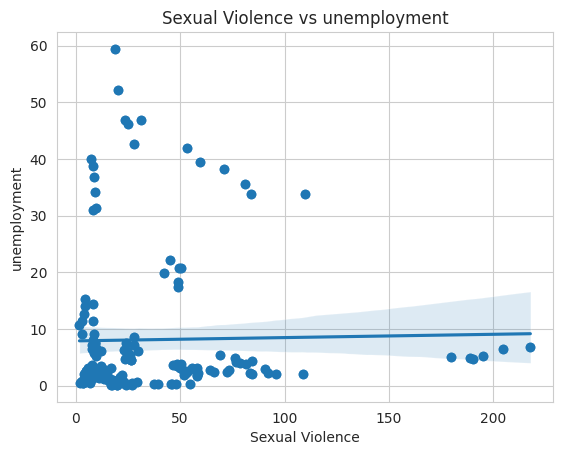

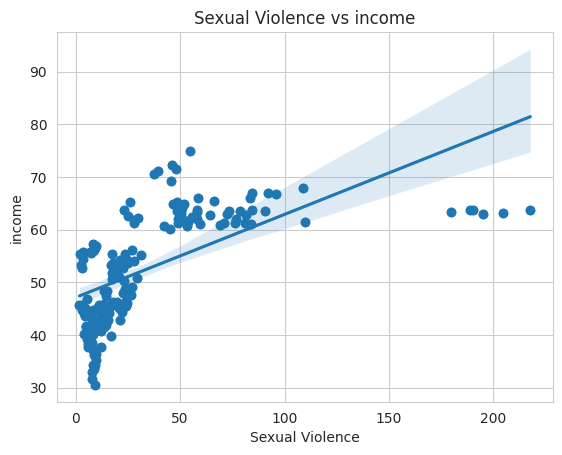

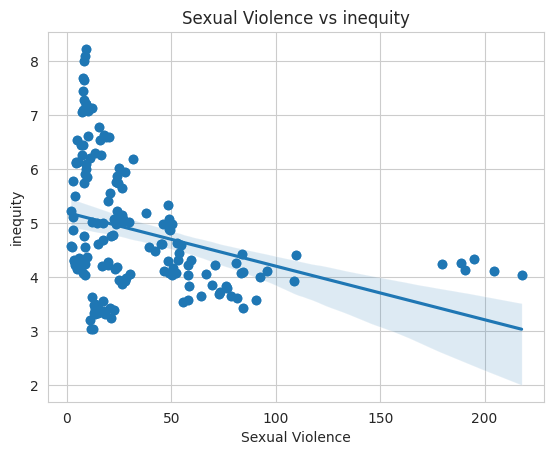

In [184]:
# Scatter Plot
features = ["poverty", "neet", "education", "unemployment", "income", "inequity"]

for feature in features:
    sns.regplot(x="sexual_violence", y=feature, data=df)
    plt.scatter(df["sexual_violence"], df[feature])
    plt.xlabel("Sexual Violence")
    plt.ylabel(feature)
    plt.title("Sexual Violence vs " + feature)
    plt.show()


# Modeling

In [185]:
X = df.drop(columns=["geo", "year", "sexual_violence"])
y = df["sexual_violence"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)

0.3195998380355628

In [186]:
# ANOVA Model
model = ols("sexual_violence ~ poverty + neet + education + unemployment + income + inequity", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F        PR(>F)
poverty           17.213123    1.0   0.017264  8.956361e-01
neet            2496.730593    1.0   2.504066  1.155912e-01
education       2385.971184    1.0   2.392981  1.239204e-01
unemployment      16.456708    1.0   0.016505  8.979420e-01
income         64696.750551    1.0  64.886817  1.972366e-13
inequity         212.515982    1.0   0.213140  6.449644e-01
Residual      154545.972876  155.0        NaN           NaN


In [187]:
X2 = sm.add_constant(df.drop(columns=["geo", "year", "sexual_violence"]))
model = sm.OLS(y, X2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        sexual_violence   R-squared:                       0.419
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     18.62
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           3.08e-16
Time:                        14:24:14   Log-Likelihood:                -785.58
No. Observations:                 162   AIC:                             1585.
Df Residuals:                     155   BIC:                             1607.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -94.7569     24.712     -3.835   

In [188]:
hypothesis_0 = "poverty = 0, neet = 0, education = 0, unemployment = 0, income = 0, inequity = 0"
print(results.t_test(hypothesis_0))

                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.0354      0.269      0.131      0.896      -0.497       0.568
c1            -0.4531      0.286     -1.582      0.116      -1.019       0.113
c2             0.1425      0.092      1.547      0.124      -0.039       0.325
c3            -0.0599      0.466     -0.128      0.898      -0.981       0.861
c4             2.3572      0.293      8.055      0.000       1.779       2.935
c5             1.3200      2.859      0.462      0.645      -4.328       6.968


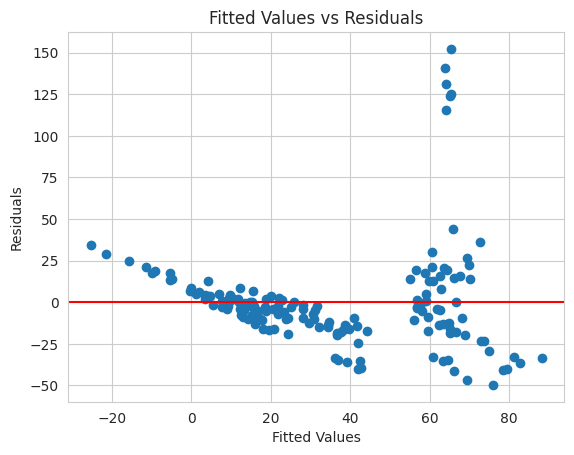

In [189]:
plt.scatter(results.fittedvalues, results.resid)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals")
plt.axhline(y=0, color="red")
plt.show()

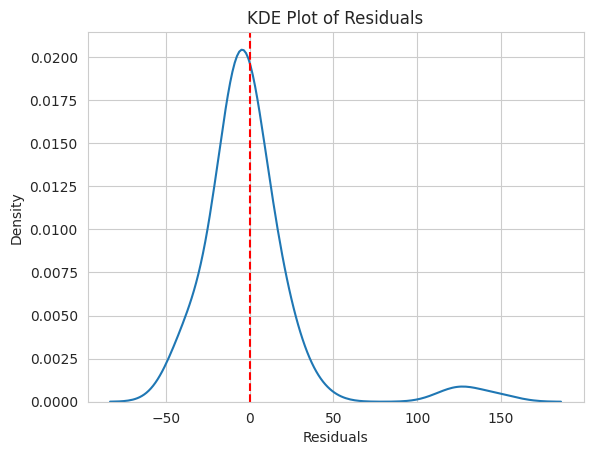

In [190]:
# KDE Plot of residuals
sns.kdeplot(results.resid)
plt.axvline(results.resid.mean(), linestyle='dashed', color="red")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("KDE Plot of Residuals")
plt.show()

### Top 5 regions with the highest Sexual Violence in total

In [191]:
data = df.drop(columns=["poverty", "neet", "education", "unemployment", "income", "inequity"])
display(data.groupby("geo").sum().sort_values(by="sexual_violence", ascending=False).head(5))

,year,sexual_violence
geo,,
Sweden,12111,1176.30
Denmark,12111,530.84
Belgium,12111,466.43
France,12111,457.76
Finland,12111,414.56


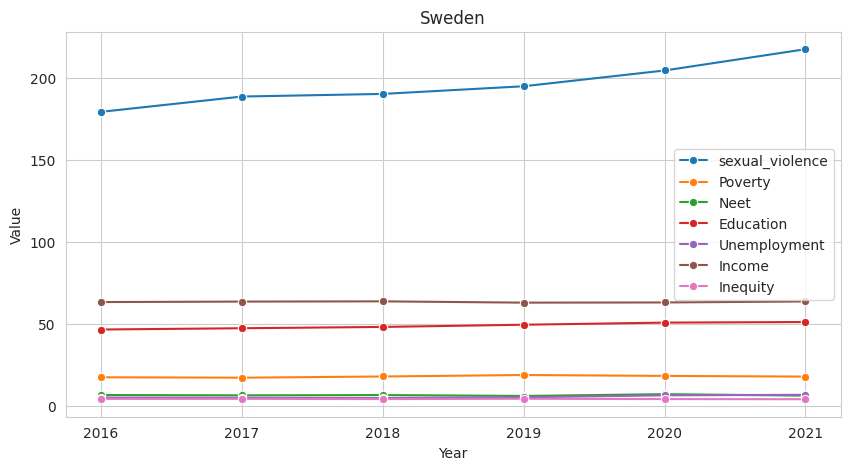

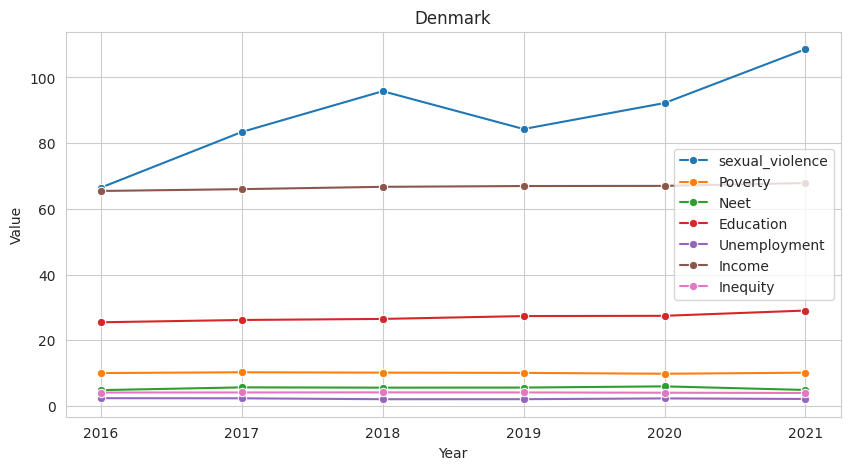

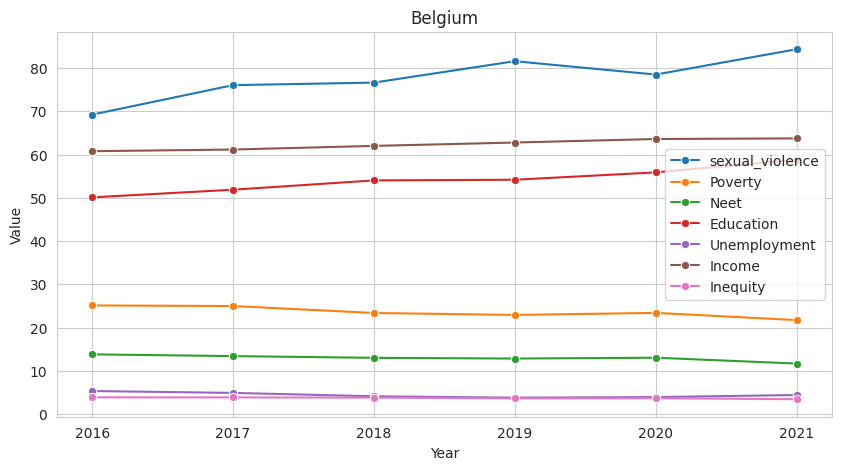

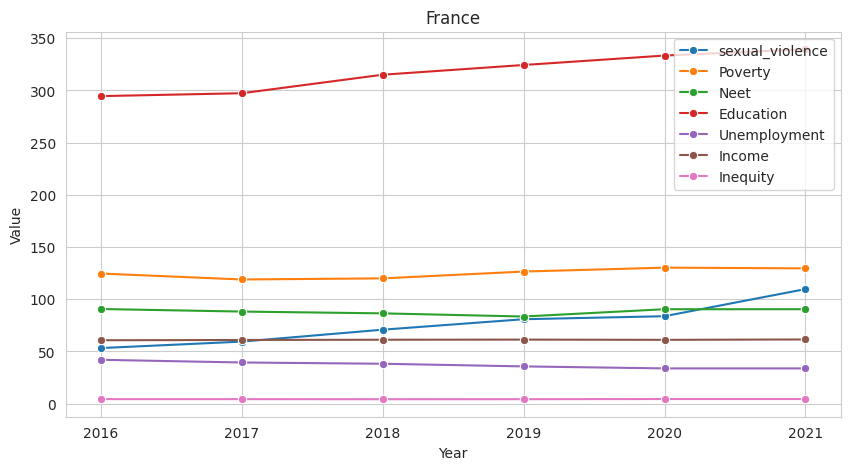

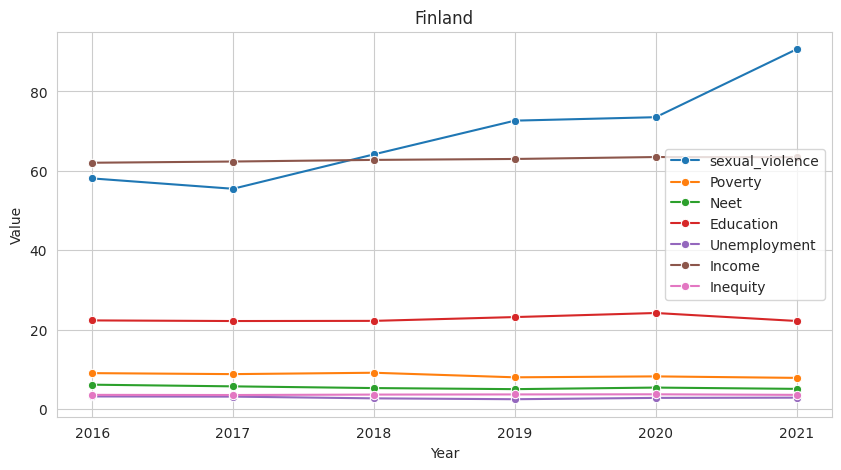

In [192]:
# Data Visualization

sweden = df[df["geo"] == "Sweden"]
denmark = df[df["geo"] == "Denmark"]
belgium = df[df["geo"] == "Belgium"]
france = df[df["geo"] == "France"]
finland = df[df["geo"] == "Finland"]

countries = [sweden, denmark, belgium, france, finland]

for country in countries:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="year", y="sexual_violence", data=country, label="sexual_violence", marker="o")
    sns.lineplot(x="year", y="poverty", data=country, label="Poverty", marker="o")
    sns.lineplot(x="year", y="neet", data=country, label="Neet", marker="o")
    sns.lineplot(x="year", y="education", data=country, label="Education", marker="o")
    sns.lineplot(x="year", y="unemployment", data=country, label="Unemployment", marker="o")
    sns.lineplot(x="year", y="income", data=country, label="Income", marker="o")
    sns.lineplot(x="year", y="inequity", data=country, label="Inequity", marker="o")
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.title(country["geo"].iloc[0])
    plt.show()